# Artist教程
>使用Artist对象对画布进行渲染。


Matplotlib的API有三层：
1. 画布`matplotlib.backend_bases.FigureCanvas`是图像绘制的区域。
2. 渲染器对象`matplotlib.backend_bases.Renderer`执行在`FigureCanvas`上绘制的过程。
3. `matplotlib.artist.Artist`对象告诉渲染器要在画布上绘制什么。

`FigureCanvas`和`Renderer`负责处理所有与用户接口工具包对接的细节，这些工具包包括了[wxPython](https://www.wxpython.org/)或PostScript®这种绘图语言。`Artist`则处理了所有的更高级的建构，如呈现和安排图像、文本和线条。一般在使用Matplotlib时，95%的时间里都会是在和`Artist`打交道。

`Artists`分两种：图元（primitive）和容器（container）。图元指的是那些我们想在画布上绘制出来的对象，如2D线条`Line2D`、矩形`Rectangle`、文本 `Text`和图像`AxesImage`等，而容器指的是放置这些图元的地方（`Axis`、`Axes`和`Figure`）。标准的使用流程是先创建一个[Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)的实例，然后使用`Figure`创建一个或多个`Axes`或`Subplot`实例，之后使用`Axes`的辅助函数创建更多的图元。

在下面的例子中，我们使用`matplotlib.pyplot.figure()`创建了一个`Figure`实例，这个方法能很方便地让我们初始化`Figure`实例，并将它们和你的用户接口或者绘图工具包`FigureCanvas`连接起来。这种做法并不是必须的，你可以单独使用PostScript、 PDF Gtk+ 或wxPython`FigureCanvas`实例，接着初始化你的`Figures`实例，之后自己手动将将两者连接起来。这种方法我们之后会提到，但因为本文更聚焦在`Artist`API上，我们就让pypolt帮我们处理其中的细节吧：

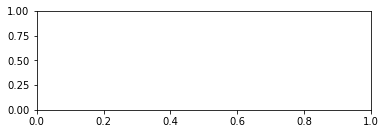

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # 创建(2行*1列)的子图，选中并绘制第一个子图

`Axes`可能是Matplotlib的API中最重要的一个，也是你最多接触到的一个。这是因为大多数对象都是在`Axes`上进行绘制的。`Axes`还有很多特别的辅助方法(`plot()`, `text()`, `hist()`, `imshow()`)来创建最常见的图元（分别对应`Line2D`, `Text`, `Rectangle`, `AxesImage`）。这些辅助方法会根据你的数据（比如`numpy`数组和字符串）按要求创建图元`Artist`对象(如`Line2D`)，将它们添加至相关的容器，并在接受到请求后进行绘制。对于你可能已经比较熟悉的`Subplot`，它其实是`Axes`的一种特殊类型，由行x列个`Subplot`组成的网格是他们的组织形式。如果你想在指定的位置创建`Axes`，可以使用`add_axes()`方法并向其中传入一个`[left, bottom, width, height]`组成的列表，其中的值为0~1的相对值： 

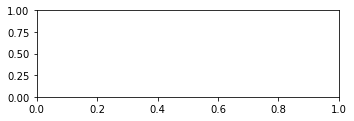

In [2]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

让我们继续我们的例子：

In [3]:
import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

在我们的例子中，`ax`是上面调用`fig.add_subplot`创建的`Axes`实例（我们刚刚说过`Subplot`是`Axes`的一个子类）。当你调用`ax.plot`的时候，它会创建一个`Line2D`实例并将它添加进`Axes.lines`列表。在下面的代码结果中，你可以看出`Axes.lines`的长度为1，它包含的对象与调用`line, = ax.plot`返回的对象是同一个：

In [4]:
ax.lines[0]

In [5]:
line

如果你接着再调用一次`ax.plot`（同时程序保持被命令的状态为开启（on），这个状态一般是默认开启的），列表中就会添加一条新的线。你可以通过下面两种方式将线条删除：

In [6]:
del ax.lines[0]
# ax.lines.remove(line) #其中一种就行，不用两个一起用！

Axes还有一些辅助函数对x轴、y轴、刻度标签和轴标签进行配置和修饰：

In [7]:
xtext = ax.set_xlabel('my xdata') # 会返回一个Text实例
ytext = ax.set_ylabel('my ydata')

当调用`ax.set_xlabel`时，它会把信息传给`XAxis`的一个`Text`实例。每个`Axes`实例都有一个`XAxis`和`YAxis`实例，他们负责处理刻度、刻度标签和轴标签的布局和绘制。

创建下面的图试试看：

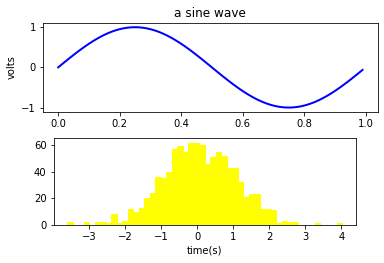

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# 为了结果可重复，固定随机数的输出结果
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50, facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time(s)')

plt.show()

## 自定义你的对象
每个图像中的元素都是一个Matplotlib的`Artist`，每个`Artist`都有一个衍生的属性列表来对它的外观进行配置。图像本身包含了一个和图像大小一样大的`Rectangle`对象，你可以使用它来设置图像的背景颜色和透明度。类似地，每个`Axes`的框（也就是Matpoltlib绘图标准的的白底黑边的那个框）都用`Rectangle`对象来决定颜色、透明度和其他属性。这些对象被存储为`Figure.patch`和`Axes.patch`的变量之一（“Patch（小块）”是从MATLAB中继承过来的名字，它指的是一个图像上的一个2D颜色块，如矩形、圆形和多边形）。每个Matplotlib的`Artist`都有以下属性：

|属性|描述|
|:----|:----|
|alpha|透明度，范围是0-1|
|animated|布尔值，可以使动画绘制更方便|
|axes|Artis所属的Axes,可以是None|
|clip_box|裁剪Artist时使用的边界框对象|
|clip_on|是否裁剪Artist的边界|
|clip_path|裁剪Artist时使用的边界|
|contains|一个函数，用于确定某个点是否在Aritst范围内|
|figure|Artis所属的Figure实例,可以是None|
|label|文本标签（比如在自动添加标签时会用到的标签）|
|picker|一个python对象，可以拾取动作事件|
|transform|图形变换|
|visible|布尔值，控制是否绘制Artist|
|zorder|数值，决定了Artist被绘制的顺序|
|rasterized|布尔值；如果为True,将矢量图转换为光栅图像（用于图像压缩&EPS透明化）|

每个属性都可以通过一种非常老式的方式来访问：更改器setter和访问器getter（是的我们知道这会惹怒Python的狂热粉，我们也计划将来支持直接访问属性或特性，但是现在我们还没做）。举个例子，如果想要将透明度变为原来的一半：

```
a = o.get_alpha()
o.set_alpha(0.5*a)
```

如果你想一次性设置很多属性，你可以使用`set`方法，在其中放入你想改变的关键字参数。比如：

```
o.set(alpha=0.5, zorder=2)
```

如果你是直接在交互式的python shell中写代码，一个查看`Artist`的属性的方便的方式是使用`matplotlib.artist.getp()`函数（在pyplot里是`getp()`），它会列出属性和它们的值。这也适用于从`Artist`衍生出的类，如`Figure`和`Rectangle`。下面是我们刚才提到的`Figure`里的矩形对象的属性：

In [9]:
import matplotlib
matplotlib.artist.getp(fig.patch)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = CapStyle.butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (1.0, 1.0, 1.0, 0.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = False
    joinstyle = JoinStyle.miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = False
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGener

上述的类的注释文档中也包含了`Artist`属性，因此你可以交互式地使用"help()"或是[matplotlib.artist](https://matplotlib.org/stable/api/artist_api.html#artist-api)来获得给定对象的属性列表。

## 对象容器
现在我们已经了解怎么样查看并设置给定对象的配置了，我们接下来还要知道怎么样获取这个对象。我们在引入时提到过，`Artist`对象分两类：图元和容器。图元一般是那些我们想要去配置的内容（如`Text`对象的字体，`Line2D`的宽度）。尽管容器也有一些属性，比如`xscale`属性可以用来控制x轴的标度是线性的对数的。在这一节中，我们会学习查看各种容器中是否含有某些你想要的`Artist`的方式。

### 图像容器
`Artist`最高级别的容器是`matplotlib.figure.Figure`，它包含了图像中的所有东西。图像的背景是一个`Rectangle`，存储在`Figure.patch`里。当你向图像中增加子图（`add_subplot()`）和axes(`add_axes()`)时，它们会被添加到`Figure.axes`中。当使用方法创建这些`Artist`时，方法会返回对应的对象：

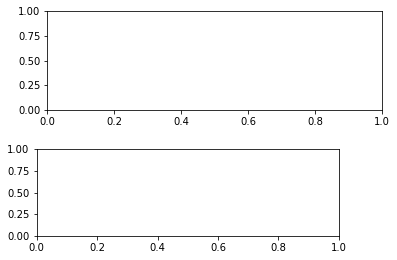

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3])

In [11]:
ax1

<AxesSubplot:>

In [12]:
print(fig.axes)

[<AxesSubplot:>, <Axes:>]


由于图像容器中还保留着一个“当前Axes”的概念以让pylab/pyplot的状态机（state machine）运行（详见[Figure.gca](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.gca)和[Figure.sca](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.sca)），因此不要直接向Axes的列表中增加或移除Axes,而是使用`add_subplot()`和`add_axes()`进行增加操作，`Axes.remove`进行移除操作。不过你可以遍历Axes的列表或索引来获得想要自定义的`Axes`。在下面的例子中，我们把所有Axes的背景网格都设置为显示：

In [13]:
for ax in fig.axes:
    ax.grid(True)

figure也有它自己的`images`,`lines`,`patches`和`text`属性，你可以直接向其中添加图元。如果你这么做，`Figure`得的默认坐标系会变成像素（一般来说我们不想这样）。反过来说，如果你使用的是Figure水平的方法（如使用`Figure.text`来添加文本），默认的坐标系则会是“图像坐标系”。在这个坐标系中，(0, 0)是图像的左下角，(1,1)是图像的右上角。

对于所有的`Artists`，你都可以通过transform属性来改变它的坐标系。你可以明确地通过设置`Artist`的transform属性为`fig.transFigure`来指定它使用图像坐标系:

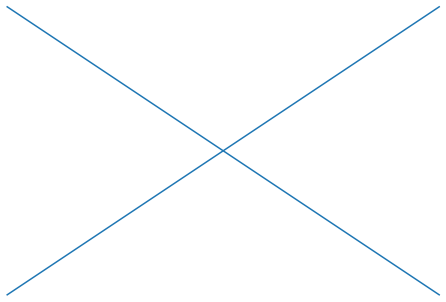

In [14]:
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig)
l2 = lines.Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1, l2])

plt.show()

下面总结了Figure包含的Artist属性：

|Figure属性|描述|
|:----------|:----|
|axes|一个`Axes`实例组成的列表(包括Subplot)|
|patch|矩形`Rectangle`背景|
|images|一个由`FigureImage`色块组成的列表——可用来展示纯像素的数据|
|legends|一个由`Legend`实例组成的列表(和`Axes.legends`不同)|
|lines|一个由`Line2D`实例组成的列表（很少用到，`Axes.lines`更多见）|
|patches|一个由`Patch`组成的列表（很少用到，`Axes.patches`更多见）|
|texts|一个由`Text`组成的列表|

### Axes容器
`matplotlib.axes.Axes`是Matplotlib宇宙的中心——它包含了绝大多数在图像中出现的`Artist`。它还有许多辅助方法能帮你创建这些`Artist`，并将它们加入到Axes容器中。它也有辅助方法能帮你获取和自定义它包含的`Artist`。和`Figure`一样，它也包含了一个`patch`色块。当使用笛卡尔坐标系时，这个色块是矩形`Rectangle`，当使用极坐标系时，这个色块是圆形`circle`；这个色块决定了绘图区域的形状、背景和边框：

In [15]:
ax = fig.add_subplot()
rect = ax.patch # 一个 Rectangle实例
rect.set_facecolor('green')

当你调用一个绘图方法，如经典的`plot()`，并向其中传入数组或列表形式的值时，这个方法会创建一个`matplotlib.lines.Line2D()`实例，使用传入的关键字参数更新这条线所有的`Line2D`属性，将这条线添加进`Axes.lines`容器，并将其返回给你：

In [16]:
x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, '-', color='blue', linewidth=2)

`plot`会返回一个由线条对象组成的列表，之所以是列表是因为你可以向其中传入多对x、y，在上面的代码中，我们将这长度为1的列表打开，并取出第一个值赋给line变量。这条线条对吸纳更也已经被添加进了`Axes.lines`列表中：

In [17]:
print(ax.lines)

与此类似，对于那些能够创建色块的方法——如`bar()`会创建一个由矩形组成的列表——会进一步将色块添加进`Axes.patches`列表：

In [18]:
n, bins, rectangles = ax.hist(np.random.randn(1000), 50)

In [19]:
rectangles

<BarContainer object of 50 artists>

In [20]:
print(len(ax.patches))

50


除非你真的知道上面的过程中到底发生了什么，否则不要直接将对象添加进`Axes.lines`或`Axes.patches`列表中。因为为了将一个对象成功创建并添加，`Axes`需要做一系列的工作：它会设置`Artist`相关的图像和axes属性，以及默认的`Axes`的坐标系变换（除非已经提前安设置了一个变换)。它还要检视`Artist`中包含的数据，用它来更新控制自动缩放用的数据结构，以调整图像大小，让图像能呈现所有数据。不过你也可以自己创建一个对象，然后使用`add_line()`和`add_patch()`等辅助方法将对象直接添加进`Axes`中。在下面的代码中，你可以看出这其中发生了什么：

None


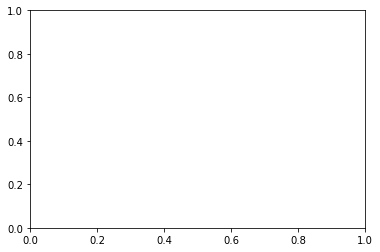

In [21]:
fig, ax = plt.subplots()
# 创建一个矩形实例
rect = matplotlib.patches.Rectangle((1,1), width=5, height=(12))
# 默认情况下它属于的axes是None
print(rect.axes)

In [22]:
# 此时坐标系变换实例也被设置为 "identity transform"
print(rect.get_data_transform())

IdentityTransform()


In [23]:
# 现在我们把Rectangle添加到Axes中
ax.add_patch(rect)
# 这时你会发现ax.add_patch方法已经设置好了axes实例
print(rect.axes)

AxesSubplot(0.125,0.125;0.775x0.755)


In [24]:
# 坐标系变换也设置好了
print(rect.get_data_transform())

CompositeGenericTransform(
    TransformWrapper(
        BlendedAffine2D(
            IdentityTransform(),
            IdentityTransform())),
    CompositeGenericTransform(
        BboxTransformFrom(
            TransformedBbox(
                Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
                TransformWrapper(
                    BlendedAffine2D(
                        IdentityTransform(),
                        IdentityTransform())))),
        BboxTransformTo(
            TransformedBbox(
                Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88),
                BboxTransformTo(
                    TransformedBbox(
                        Bbox(x0=0.0, y0=0.0, x1=6.0, y1=4.0),
                        Affine2D(
                            [[72.  0.  0.]
                             [ 0. 72.  0.]
                             [ 0.  0.  1.]])))))))


In [25]:
# 默认的坐标系变换就是ax.tranData
print(ax.transData)

CompositeGenericTransform(
    TransformWrapper(
        BlendedAffine2D(
            IdentityTransform(),
            IdentityTransform())),
    CompositeGenericTransform(
        BboxTransformFrom(
            TransformedBbox(
                Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
                TransformWrapper(
                    BlendedAffine2D(
                        IdentityTransform(),
                        IdentityTransform())))),
        BboxTransformTo(
            TransformedBbox(
                Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88),
                BboxTransformTo(
                    TransformedBbox(
                        Bbox(x0=0.0, y0=0.0, x1=6.0, y1=4.0),
                        Affine2D(
                            [[72.  0.  0.]
                             [ 0. 72.  0.]
                             [ 0.  0.  1.]])))))))


In [26]:
# 注意Axes的x轴范围并没有发生改变
print(ax.get_xlim())

(0.0, 1.0)


In [27]:
# 但是数据的范围已经更新了，以包含新添加的矩形
print(ax.dataLim.bounds)

(1.0, 1.0, 5.0, 12.0)


In [28]:
# 手动激活自动缩放机制
ax.autoscale_view()
# 现在xlim就被更新了，包绕了矩形和矩形的边框
print(ax.get_xlim())

(0.75, 6.25)


In [29]:
# 这时我们需要手动强制进行图像的绘制
fig.canvas.draw()

有许多能够创建图元`Artist`并将他们加入对应容器的`Axes`辅助方法。下面的表格总结了其中一小部分，并附上了它们创建的`Artist`和存储这些`Artist`的地方：

|Axes辅助方法|Artist|容器|
|:-----------|:------|:---|
|annotate-文字注释|Annotation|ax.texts|
|bar-柱状图|Rectangle|ax.patches|
|errorbar-误差柱状图|Line2D和Rectangle|ax.lines和ax.patches|
|fill-填充数据包绕的区域|Polygon|ax.patches|
|hist-直方图|Rectangle|ax.patches|
|imshow-图像数据|AxesImage|ax.images|
|legend-Axes图例|Legned|ax.legends|
|plot-xy绘图|Line2D|ax.lines|
|scatter-散点图|PolyCollection|ax.collections|
|text-文本|Text|ax.texts|

除了上述的`Artist`，`Axes`还包含了两个重要的`Artist`容器：`XAxis`和`YAxis`,它们负责刻度和刻度标签的绘制，并将他们存储在实例变量`xaixs`和`yaxis`中。关于`XAxis`和`YAxis`的详细内容我们会在后文中详细说明，但是请注意`Axes`中有许多辅助方法会进一步调用并作用于`Axis`实例上，所以除非你愿意，一般不需要和它们有直接的交流。举个例子，你可以使用`Axes`的辅助方法来设置`Xaxis`刻度标签的字体颜色：

In [30]:
for label in ax.get_xticklabels():
    label.set_color('orange')

下面的表格总结了Axes包含的Artist：

|Axes属性|描述|
|:------|:--|
|artists|一个`Artist`实例组成的列表|
|patch|Axes背景所用的`Rectangle`实例|
|collections|一个`Collection`实例组成的列表|
|images|一个`AxesImage`实例组成的列表|
|legends|一个`Legend`实例组成的列表|
|lines|一个`Line2D`实例组成的列表|
|patches|一个`Patch`实例组成的列表|
|texts|一个`Text`实例组成的列表|
|xaxis|一个`matplotlib.axis.XAxis`实例|
|yaxis|一个`matplotlib.axis.YAxis`实例|

### 坐标轴容器
坐标轴`matplotlib.axis.Axis`实例负责绘制刻度线、网格线、刻度标签和坐标轴标签。你可以分别对y轴的左刻度线和右刻度线进行配置，也可以分别对x轴的上刻度线和下刻度线进行配置。`Axis`也存储了用于自动缩放、平移和放大缩小时所用的数据和视图区间，它还存储了`Locator`和`Formatter`两个实例，用来控制刻度的位置和刻度的格式。

每个`Axis`对象都包含一个标签`label`属性（这也是`pyplot`在调用`xlabel`和`ylabel`时修改的属性），它还包含分别由主刻度和副刻度组成的列表。刻度由`axis.XTick`和`axis.YTick`控制，它们包含了组成刻度和刻度标签的线条和文本图元。因为刻度是按需实时动态生成的（比如说在你拖动或放大缩小图像时），所以你在获得主刻度和副刻度的列表时要使用他们对应的访问方法`axis.Axis.get_major_ticks`和`axis.Axis.get_minor_ticks`。尽管刻度容器包含了我们在下文中会提到的多个图元，`Axis`实例也有访问方法能返回刻度线、刻度标签、刻度位置等内容：

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

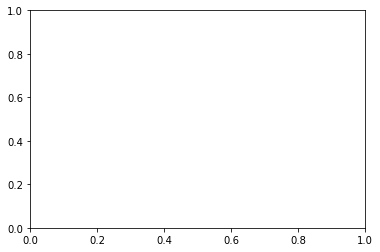

In [31]:
fig, ax = plt.subplots()
axis = ax.xaxis
axis.get_ticklocs()

In [32]:
axis.get_ticklabels()

[Text(0.0, 0, '0.0'),
 Text(0.2, 0, '0.2'),
 Text(0.4, 0, '0.4'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.8, 0, '0.8'),
 Text(1.0, 0, '1.0')]

In [33]:
axis.get_ticklines()

<a list of 12 Line2D ticklines objects>

注意刻度线的数量是刻度标签的两倍，因为默认情况下会有x轴上方和下方两组刻度线，但是刻度标签只有x轴下方的一组。不过这也是可以自定义的。

上面的方法默认只能返回主刻度的列表，不过你也可以要求它返回副刻度的：

In [34]:
axis.get_ticklabels(minor=True)
axis.get_ticklines(minor=True)

<a list of 0 Line2D ticklines objects>

下面的表格总结了一些有用的`Axis`的访问器方法（它们也有对应的修改器，比如`set_major_fomatter()`）:

|`Axis`访问器方法|描述|
|:-------------|:---|
|get_scale|坐标轴的缩放方法，如指数'log'或线性'linear'|
|get_view_interval|坐标轴显示的区间|
|get_data_interval|数据在坐标轴上分布的区间|
|get_gridlines|一个由坐标轴上的网格线组成的列表|
|get_label|坐标轴标签——一个`Text`实例|
|get_offset_text|坐标轴偏移文本——一个`Text`实例|
|get_ticklabels|一个`Text`实例组成的列表——关键字minor=True\|False|
|get_ticklines|一个`Line2D`实例组成的列表——关键字minor=True\|False|
|get_ticklocs|一个由刻度组成的列表——关键字minor=True\|False|
|get_major_locator|主刻度的`ticker.Locator`实例|
|get_major_formatter|主刻度的`ticker.Formatter`实例|
|get_minor_locator|副刻度的`ticker.Locator`实例|
|get_minor_formatter|副刻度的`ticker.Formatter`实例|
|get_major_ticks|一个由主刻度的`Tick`实例组成的列表|
|get_minor_ticks|一个由副刻度的`Tick`实例组成的列表|
|grid|打开或关闭主刻度或副刻度的网格线|

在下面并不美观的例子中，我们自定义了`Axes`和`Tick`的属性：

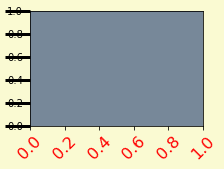

In [35]:
# 使用plt.figure创建一个matplotlib.figure.Figure实例
fig = plt.figure()
rect = fig.patch # 一个矩形实例
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')

for label in ax1.xaxis.get_ticklabels():
    # label是一个Text实例
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)
    
for line in ax1.yaxis.get_ticklines():
    # line是一个line2D实例
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)

plt.show()

### 刻度容器
刻度`matplotlib.axis.Tick`是我们从`Figure`到`Axes`到`Axis`到`Tick`的层级的最后一级容器。`Tick`包含了刻度和网格线实例，以及上刻度线和下刻度线的标签实例。上面的每个实例都能直接通过`Tick`的属性来访问：

|Tick属性|描述|
|:------|:---|
|tick1line|一个`Line2D`实例|
|tick2line|一个`Line2D`实例|
|gridline|一个`Line2D`实例|
|label1|一个`Text`实例|
|label2|一个`Text`实例|

在下面的例子中，我们设置右侧刻度的格式为带有美元符号、绿色、位于y轴右侧：

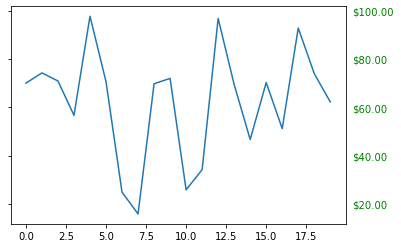

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 固定随机数结果
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 使用自动的StrMethodFormatter
ax.yaxis.set_major_formatter('${x:1.2f}')

ax.yaxis.set_tick_params(which='major', labelcolor='green', 
                         labelleft=False, labelright=True)
plt.show()